# Nome: Henrique Augusto Gomes Togo
# Matrícula: 231111280

## Questão 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
arr_pca = np.loadtxt("data_pca_question.csv", delimiter=",", dtype=float)
mean_vec_pca = np.mean(arr_pca, axis=0)
std_vec_pca = np.sqrt(np.var(arr_pca, axis=0))
for i in range(len(mean_vec_pca)):
    print(f'Média x{i + 1} = {mean_vec_pca[i]:.2f}')
    print(f'Desvio Padrão x{i + 1} = {std_vec_pca[i]:.2f}')
    print(40*'=')

Média x1 = 2.52
Desvio Padrão x1 = 1.41
Média x2 = -2.81
Desvio Padrão x2 = 5.38
Média x3 = 0.30
Desvio Padrão x3 = 9.36


In [3]:
pca_normal = (arr_pca - mean_vec_pca)/std_vec_pca

mean_pca_normal = np.mean(pca_normal, axis=0)
std_pca_normal = np.sqrt(np.var(pca_normal, axis=0))
for i in range(len(mean_pca_normal)):
    print(f'Média z{i + 1} = {mean_pca_normal[i]:.2f}')
    print(f'Desvio Padrão z{i + 1} = {std_pca_normal[i]:.2f}')
    print(40*'=')

Média z1 = -0.00
Desvio Padrão z1 = 1.00
Média z2 = 0.00
Desvio Padrão z2 = 1.00
Média z3 = -0.00
Desvio Padrão z3 = 1.00


In [4]:
cov_vec_pca = np.cov(np.transpose(pca_normal))
print(f'S = {cov_vec_pca}')

S = [[ 1.001001   -0.53439232 -0.60672834]
 [-0.53439232  1.001001    0.94108144]
 [-0.60672834  0.94108144  1.001001  ]]


In [5]:
eigenvalues_pca, eigenvectors_pca = np.linalg.eig(cov_vec_pca) 
eigen_pca = [] # Tuples (eigenvalue, eigenvector)
for i in range(len(eigenvalues_pca)):
    eigen_pca.append((eigenvalues_pca[i], eigenvectors_pca[:,i]))
eigen_pca = sorted(eigen_pca, key=lambda element:(element[0]), reverse=True)

for i in range(len(eigenvalues_pca)):
    print(f'Autovalor {i + 1}: {eigen_pca[i][0]}\nAutovetor {i + 1}: {eigen_pca[i][1]}')

Autovalor 1: 2.4058885474588987
Autovetor 1: [ 0.49831409 -0.60532847 -0.62069357]
Autovalor 2: 0.5415530005252888
Autovetor 2: [-0.86283557 -0.41630393 -0.28671556]
Autovalor 3: 0.055561455018817284
Autovetor 3: [ 0.08484009 -0.6784309   0.72974905]


In [8]:
eigenvalues_total = np.sum(eigenvalues_pca)
for i in range(len(eigen_pca)):
    print(f'Porcentagem do Autovalor {i + 1}: {(100 * eigen_pca[i][0] / eigenvalues_total):.2f}%')

Porcentagem do Autovalor 1: 80.12%
Porcentagem do Autovalor 2: 18.03%
Porcentagem do Autovalor 3: 1.85%


Considerando que os dois primeiros autovalores correspondem a mais de 98%, pode-se utilizar duas componentes principais. Para o caso de utilizar apenas a primeira componente principal, em uma primeira análise, deve-se manter uma cautela.

In [22]:
k_order_pca_1 = 1
w1_list = []
for i in range(k_order_pca_1):
    w1_list.append(eigen_pca[i][1])

k_order_pca_2 = 2
w2_list = []
for i in range(k_order_pca_2):
    w2_list.append(eigen_pca[i][1])


w1 = np.transpose(np.array(w1_list))
w2 = np.transpose(np.array(w2_list))
print(f'W1 = {w1}\n')

print(f'W2 = {w2}\n')


W1 = [[ 0.49831409]
 [-0.60532847]
 [-0.62069357]]

W2 = [[ 0.49831409 -0.86283557]
 [-0.60532847 -0.41630393]
 [-0.62069357 -0.28671556]]



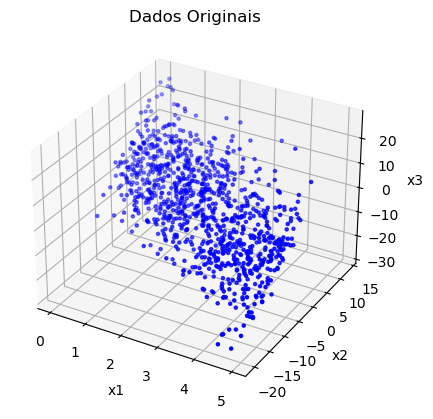

In [39]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(arr_pca[:,0], arr_pca[:,1], arr_pca[:,2], color='blue', marker='.')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.title('Dados Originais')

plt.show()

In [40]:
z_1 = np.transpose(w1) @ np.transpose(arr_pca - mean_vec_pca)
x_r_1 = np.transpose(w1 @ z_1) + (mean_vec_pca)

z_2 = np.transpose(w2) @ np.transpose(arr_pca - mean_vec_pca)
x_r_2 = np.transpose(w2 @ z_2) + (mean_vec_pca)

z_1 = np.transpose(z_1)
z_2 = np.transpose(z_2)

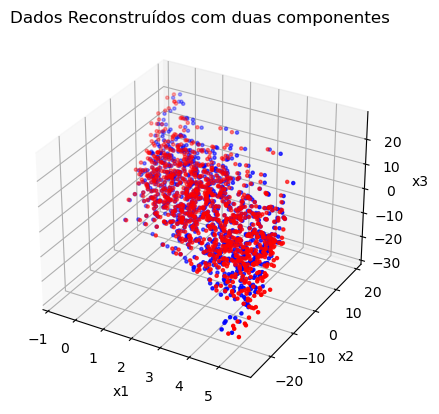

In [66]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(arr_pca[:,0], arr_pca[:,1], arr_pca[:,2], color='blue', marker='.')
ax.scatter(x_r_2[:,0], x_r_2[:,1], x_r_2[:,2], color='red', marker='.')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.title('Dados Reconstruídos com duas componentes')
plt.show()

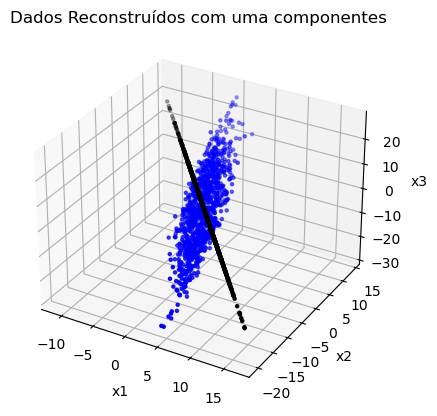

In [70]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(arr_pca[:,0], arr_pca[:,1], arr_pca[:,2], color='blue', marker='.')
ax.scatter(x_r_1[:,0], x_r_1[:,1], x_r_1[:,2], color='black', marker='.')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.title('Dados Reconstruídos com uma componentes')
plt.show()

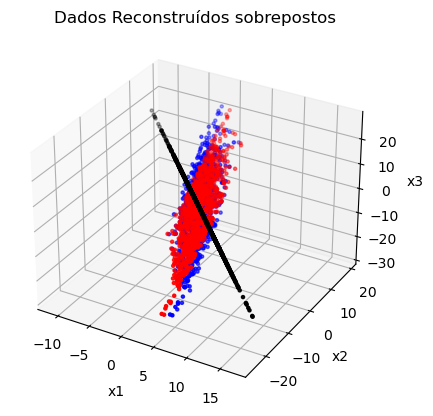

In [71]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(arr_pca[:,0], arr_pca[:,1], arr_pca[:,2], color='blue', marker='.')
ax.scatter(x_r_2[:,0], x_r_2[:,1], x_r_2[:,2], color='red', marker='.')
ax.scatter(x_r_1[:,0], x_r_1[:,1], x_r_1[:,2], color='black', marker='.')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.title('Dados Reconstruídos sobrepostos')
plt.show()